Some notes which I had taken down for pandas.

In [1]:
import pandas as pd
import numpy as np

Searching and replacing a pattern in a column in a pandas dataframe

In [2]:
d = {
    'id': [100, 200], 
    'details': ['{"name" => "abc", "age" => 23}', '{"name" => "def", "age" => 24}']
    }
df = pd.DataFrame(d)
df

,id,details
0,100,"{""name"" => ""abc"", ""age"" => 23}"
1,200,"{""name"" => ""def"", ""age"" => 24}"


Now let's replace the '=>' in the second column to convert the data into json format

In [3]:
df['details'] = df['details'].str.replace('=>', ':')
df

,id,details
0,100,"{""name"" : ""abc"", ""age"" : 23}"
1,200,"{""name"" : ""def"", ""age"" : 24}"


Lets add another column into the dataframe

In [4]:
sports = ['Football|Cricket', 'Football|Hockey|Chess|Badminton']
df['sports'] = sports
df

,id,details,sports
0,100,"{""name"" : ""abc"", ""age"" : 23}",Football|Cricket
1,200,"{""name"" : ""def"", ""age"" : 24}",Football|Hockey|Chess|Badminton


Now to convert the 'sports' column into a json array split by '|', we have apply the following logic of converting a list to a json array on the whole column- 

In [5]:
import json

In [6]:
x = [str(i) for i in range(10)]
x

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
json.dumps(x)

'["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]'

Now let's apply this to the whole column.

In [8]:
df['sports'] = df['sports'].str.split('|').apply(lambda x: json.dumps(x))
df

,id,details,sports
0,100,"{""name"" : ""abc"", ""age"" : 23}","[""Football"", ""Cricket""]"
1,200,"{""name"" : ""def"", ""age"" : 24}","[""Football"", ""Hockey"", ""Chess"", ""Badminton""]"


### Dropping columns in a Dataframe. 

Let's create a fake dataset using faker first

In [9]:
from faker import Faker

In [10]:
fake = Faker()

In [11]:
df = pd.DataFrame()
df['name'] = [fake.name() for _ in range(1000)]
df['ip'] = [fake.ipv4_private(network=False, address_class=None) for _ in range(1000)]
df['isTrue'] = np.random.randint(0, 2, size=1000, dtype=np.uint8).view(bool)
df['phone'] = [fake.phone_number() for _ in range(1000)]
df['job'] = [fake.job() for _ in range(1000)]
df['location'] = [fake.locale() for _ in range(1000)]
df['md5'] = [fake.md5(raw_output=False) for _ in range(1000)]

In [12]:
df

,name,ip,isTrue,phone,job,location,md5
0,Thomas Lee,192.168.199.13,False,01431774506,"Designer, jewellery",cs_CZ,23b4e03d627898020e9f5b6e942125bc
1,Ryan Wilson,172.19.64.41,False,463.505.9726,Aid worker,tk_TM,ebd2d0b73dda04688b988eaf7de123d5
2,Tara Phillips,10.234.224.89,False,642.709.3653x052,"Surveyor, minerals",ff_SN,dd43f8b5c0908ce81bca711f2b1d6873
3,Bradley Sparks,10.41.205.78,False,1-054-354-8782,Armed forces logistics/support/administrative ...,hne_IN,637f0ee942ef64816626a18bd9a0763f
4,Jerry Mathis,10.224.23.241,False,329-366-3460x163,"Radiographer, diagnostic",hu_HU,311ac3b0338bed4f2561027cfe53c0cf
5,Deborah Benson,172.26.252.209,False,269-617-9964x143,Chief Strategy Officer,ta_LK,78f716c2cbda82de9c0d8618d8cab802
6,Jessica Miller,172.16.236.180,False,543.242.0411x4475,"Scientist, marine",dv_MV,887ccc4300c743d7d8a366a978c61b89
7,Heather Maxwell,172.22.48.207,True,164-060-3579x3541,"Embryologist, clinical",ti_ET,b6fb0cfaa317280a1cfb2734e4ad5c8a
8,Tamara Shaw,10.114.235.85,True,1-378-117-7262,Marketing executive,nl_NL,70203c9306f18284b59f8b0f6a382222
9,Christopher Williams,10.172.59.41,True,764.653.8552x6140,"Scientist, marine",nn_NO,17db6dd545c6f0dc20c863243cd25335


Now if we want to remove the columns 'isTrue' and 'md5'

In [13]:
to_drop = ['isTrue', 'md5']
df.drop(to_drop, inplace=True, axis=1)
df

,name,ip,phone,job,location
0,Thomas Lee,192.168.199.13,01431774506,"Designer, jewellery",cs_CZ
1,Ryan Wilson,172.19.64.41,463.505.9726,Aid worker,tk_TM
2,Tara Phillips,10.234.224.89,642.709.3653x052,"Surveyor, minerals",ff_SN
3,Bradley Sparks,10.41.205.78,1-054-354-8782,Armed forces logistics/support/administrative ...,hne_IN
4,Jerry Mathis,10.224.23.241,329-366-3460x163,"Radiographer, diagnostic",hu_HU
5,Deborah Benson,172.26.252.209,269-617-9964x143,Chief Strategy Officer,ta_LK
6,Jessica Miller,172.16.236.180,543.242.0411x4475,"Scientist, marine",dv_MV
7,Heather Maxwell,172.22.48.207,164-060-3579x3541,"Embryologist, clinical",ti_ET
8,Tamara Shaw,10.114.235.85,1-378-117-7262,Marketing executive,nl_NL
9,Christopher Williams,10.172.59.41,764.653.8552x6140,"Scientist, marine",nn_NO


### Inspecting columns

In [14]:
%matplotlib inline

Lets inpect the job column to figure out the max length of the values and plot the general trend.

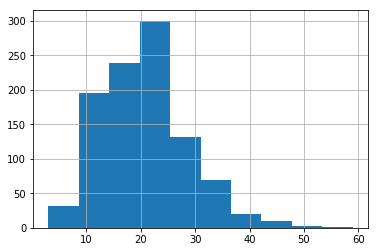

In [15]:
col = 'job'
df['len_job'] = df[col].str.len()
df['len_job'].hist()

Now lets find out what this value is

In [16]:
df[col].str.len().max()

59

In [17]:
sorted_lens = df[col].str.len().sort_values().index
sorted_lens[-1]

628

117 is the index of the column. Lets print it and check

In [18]:
df.iloc[sorted_lens[-1]][col]

'Scientist, clinical (histocompatibility and immunogenetics)'

In [19]:
DATE_FORMAT = "%Y-%m-%d %H:%M:%S.%f"
date_from = '-10d'
date_to = 'now'
fake.date_time_between(start_date='-10d', end_date='now').strftime(DATE_FORMAT)

'2018-09-16 16:17:29.000000'

In [20]:
df['event_time'] = [fake.date_time_between(start_date=date_from, end_date=date_to).strftime(DATE_FORMAT) for _ in range(1000)]

### Split a column based on a delimiter

In [21]:
df[['date', 'time']] = df['event_time'].str.split(' ', expand=True)

In [22]:
df.head()

,name,ip,phone,job,location,len_job,event_time,date,time
0,Thomas Lee,192.168.199.13,01431774506,"Designer, jewellery",cs_CZ,19,2018-09-17 10:53:34.000000,2018-09-17,10:53:34.000000
1,Ryan Wilson,172.19.64.41,463.505.9726,Aid worker,tk_TM,10,2018-09-10 04:57:32.000000,2018-09-10,04:57:32.000000
2,Tara Phillips,10.234.224.89,642.709.3653x052,"Surveyor, minerals",ff_SN,18,2018-09-16 07:04:46.000000,2018-09-16,07:04:46.000000
3,Bradley Sparks,10.41.205.78,1-054-354-8782,Armed forces logistics/support/administrative ...,hne_IN,53,2018-09-14 09:43:58.000000,2018-09-14,09:43:58.000000
4,Jerry Mathis,10.224.23.241,329-366-3460x163,"Radiographer, diagnostic",hu_HU,24,2018-09-17 18:22:54.000000,2018-09-17,18:22:54.000000


### get all unique entries in a column

In [23]:
df.date.unique()

array(['2018-09-17', '2018-09-10', '2018-09-16', '2018-09-14',
       '2018-09-09', '2018-09-15', '2018-09-11', '2018-09-12',
       '2018-09-13', '2018-09-18', '2018-09-19'], dtype=object)